<a href="https://colab.research.google.com/github/peachonali/Course-AI-and-Machine-Learning/blob/main/Week5_Lab4_TSP%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1  Traveling Salesman Problem (TSP) และ แสดงผลการทำงานของโปรแกรมบนหน้าจอ

In [ ]:
from collections import deque #นำคำสั่ง deque เข้ามาจาก collecttions
# เพิ่มข้อมูลซ้ายได้ , เพิ่มข้อมูลขวาได้ , pop ซ้ายได้เร็ว (O(1))
def tsp_bfs(graph):
    n = len(graph) # เก็บจำนวนเมือง 2 มิติ ความยาวทั้งหมด ซึ่งก็คือ 4 แถว 4 เมือง
    startCity = 0 # เมืองเริ่มต้น index 0
    opt_path = [] # เก็บเส้นทาง
    min_cost = float('inf') # ค่าสูงสุดจาก inf แปลงเป็น float เก็บใน min_cost

    # Queue for BFS: Each element is (cur_path, cur_cost)
    dq = deque([([startCity], 0)]) # เก็บค่าแต่ละช่วง
    # (ค่าเมืองเริ่มต้น , ค่าcost)  เป็นแต่ละช่วง

    print("Path Traversal:")  # แสดงผลลัพธ์ในแต่ละช่วง

    while dq:  # ทำจนกว่า dq จะว่าง
        cur_path, cur_cost = dq.popleft() #นำค่าซ้ายออก เก็บเมืองแรก และเก็บค่าใช้จ่าย
        cur_city = cur_path[-1]  #index ดูเมืองล่าสุด เก็บในเมือง ปัจจุบัน

        # แสดงเส้นทาง และค่าใช้จ่าย ทุกครั้ง
        print(f"Current Path: {cur_path}, Current Cost: {cur_cost}")

        # ตรวจว่าครบทุกเมืองหรือยัง
        # ความยาวเส้นทาง เท่ากับ n คือเส้นทางทั้งหมด และ
        # เมืองแรกตำแหน่งแรก เท่ากับ เมืองเริ่มต้น
        if len(cur_path) == n and cur_path[0] == startCity:
            #เมืองปัจจุบันกับเมืองเริ่มต้น + ค่าใช้จ่าย เก็บไว้ total
            total_cost = cur_cost + graph[cur_city][startCity]
            # ถ้าค่่าใช้จ่ายรวม น้อยกว่า ค่าที่เปรียบเทียบ
            if total_cost < min_cost:
                min_cost = total_cost # ให้เก็บค่าใหม่ ไว้ในค่าต่ำสุด
                opt_path = cur_path + [startCity]  #เมืองแรก+เมืองเริ่มต้น เก็บเส้นทาง
            continue # ข้ามไปรอบถัดไป

        # ขยายเส้นทาง กรณีที่ยังไปไม่ครบเมือง
        for next_city in range(n):  #วนดูเมืองถัดไป ตามจำนวน n
            if next_city not in cur_path: # เมืองถัดไป ถ้าไม่เคยไป เมืองนี้ ทำต่อ
                # เส้นทางเมืองที่มีตอนนี้ + เส้นทางเมืองใหม่ เก็บไว้ เส้นทางใหม่
                new_path = cur_path + [next_city]
                # ค่าใช้จ่ายเดิมเดิม + ค่าใช้จ่ายเมืองใหม่
                new_cost = cur_cost + graph[cur_city][next_city]
                dq.append((new_path, new_cost)) # นำค่าใหม่ออกมาใส่ dq

    return min_cost, opt_path

# Example graph as a 2D list adjacency matrix
# graph[i][j] = ระยะทางจากเมือง i ไปเมือง j
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
] # บวกที่ละคู่[0, 1, 2, 3]  เช่น 0 ไป 1 , 1 ไป 2 , 2 ไป 3  ดูจากล่างขึ้นบน

# Solve TSP using BFS
min_cost, opt_path = tsp_bfs(graph)

print("\nOptimal Solution:")
print(f"Minimum cost: {min_cost}")
print(f"Optimal path: {opt_path}")

Path Traversal:
Current Path: [0], Current Cost: 0
Current Path: [0, 1], Current Cost: 10
Current Path: [0, 2], Current Cost: 15
Current Path: [0, 3], Current Cost: 20
Current Path: [0, 1, 2], Current Cost: 45
Current Path: [0, 1, 3], Current Cost: 35
Current Path: [0, 2, 1], Current Cost: 50
Current Path: [0, 2, 3], Current Cost: 45
Current Path: [0, 3, 1], Current Cost: 45
Current Path: [0, 3, 2], Current Cost: 50
Current Path: [0, 1, 2, 3], Current Cost: 75
Current Path: [0, 1, 3, 2], Current Cost: 65
Current Path: [0, 2, 1, 3], Current Cost: 75
Current Path: [0, 2, 3, 1], Current Cost: 70
Current Path: [0, 3, 1, 2], Current Cost: 80
Current Path: [0, 3, 2, 1], Current Cost: 85

Optimal Solution:
Minimum cost: 80
Optimal path: [0, 1, 3, 2, 0]


#2  จากโปรแกรมในข้อ 1 ให้ นศ ปรับปรุงโปรแกรมดังกล่าวให้ผู้เล่นสามารถป้อนค่า N ซึ่งหมายถึงจำนวนเมืองได้ และให้โปรแกรมสร้างเส้นทางระหว่างเมือง (path) โดยอัตโนมัติ โดยมี cost ระหว่างเส้นทางแต่ ละเมืองเป็นแบบสุ่ม มีค่าระหว่าง 0 ถึง 50 โดยมี step เป็น 5 เช่น 0, 5, 10, 15 จนถึง 50

In [ ]:
from collections import deque
import random

def tsp_bfs(graph):
    n = len(graph) # number of cities
    startCity = 0 # starting city
    opt_path = [] # To store the optimal path
    min_cost = float('inf') # Initialize minimum cost as infinity

    # Queue for BFS: Each element is (cur_path, cur_cost)
    dq = deque([([startCity], 0)])

    print("Path Traversal:")

    while dq:
        cur_path, cur_cost = dq.popleft()
        cur_city = cur_path[-1]

        # If all cities are visited
        if len(cur_path) == n:
            total_cost = cur_cost + graph[cur_city][startCity]
            if total_cost < min_cost:
                min_cost = total_cost
                opt_path = cur_path + [startCity]
            continue

        # Explore all neighboring cities
        for next_city in range(n):
            if next_city not in cur_path:
                new_path = cur_path + [next_city]
                new_cost = cur_cost + graph[cur_city][next_city]
                dq.append((new_path, new_cost))

    return min_cost, opt_path

# --- ส่วนที่เพิ่มตามโจทย์ ---
# 1. รับค่า N จำนวนเมือง
N = int(input("ป้อนจำนวนเมือง (N): "))

# 2. สร้างเส้นทาง (graph) แบบสุ่มอัตโนมัติ
# ค่าระหว่าง 0-50 โดยมี step เป็น 5 (0, 5, 10, ..., 50)
graph = []
for i in range(N):
    row = []
    for j in range(N):
        if i == j:
            row.append(0) # เมืองเดียวกัน cost เป็น 0
        else:
            # random.randrange(start, stop, step)
            random_cost = random.randrange(0, 55, 5)
            row.append(random_cost)
    graph.append(row)

print("\nGenerated Graph (Adjacency Matrix):")
for r in graph:
    print(r)

# Solve TSP using BFS
min_cost, opt_path = tsp_bfs(graph)

print("\nOptimal Solution:")
print(f"Minimum cost: {min_cost}")
print(f"Optimal path: {opt_path}")

ป้อนจำนวนเมือง (N): 2

Generated Graph (Adjacency Matrix):
[0, 5]
[20, 0]
Path Traversal:

Optimal Solution:
Minimum cost: 25
Optimal path: [0, 1, 0]


#3 จากโปรแกรมในข้อ 2 ให้ นศ ปรับปรุงโปรแกรมดังกล่าวให้มีการจับเวลาเมื่อเรียกฟังก์ชั่นในการแก้ปัญหา Traveling Salesman Problem (TSP) และแสดงผลเวลาดังกล่าวทางหน้าจอ จากนั้นให้นักศึกษาทดลองป้อนค่า N เป็น 1 จนถึง 12 อย่างละ 10 ครั้งและบันทึกผลเวลาที่ได้แต่ละครั้งลงในตารางด้านล่างนี้ และ Plot กราฟเส้นแสดงให้เห็นถึงเวลาเฉลี่ยเปรียบเทียบกับจำนวน N ที่ทดลอง

In [ ]:
import time
import random
from collections import deque

def tsp_bfs_experiment(graph):
    n = len(graph)
    startCity = 0
    min_cost = float('inf')
    dq = deque([([startCity], 0)])

    while dq:
        cur_path, cur_cost = dq.popleft()
        cur_city = cur_path[-1]
        if len(cur_path) == n:
            total_cost = cur_cost + graph[cur_city][startCity]
            if total_cost < min_cost:
                min_cost = total_cost
            continue
        for next_city in range(n):
            if next_city not in cur_path:
                new_path = cur_path + [next_city]
                new_cost = cur_cost + graph[cur_city][next_city]
                dq.append((new_path, new_cost))
    return min_cost

avg_times = []
N_range = range(1, 13)
trials = 10

print(f"Starting experimentation (N=1 to 12, {trials} trials each)...\n")

for n in N_range:
    total_time_n = 0
    print(f"--- N = {n} ---")
    for t in range(1, trials + 1):
        # Generate random graph for N cities
        graph = []
        for i in range(n):
            row = []
            for j in range(n):
                if i == j:
                    row.append(0)
                else:
                    row.append(random.randrange(0, 55, 5))
            graph.append(row)

        # Measure execution time
        start_t = time.time()
        tsp_bfs_experiment(graph)
        end_t = time.time()
        trial_time = end_t - start_t
        total_time_n += trial_time

        # แสดงค่าแต่ละรอบ
        print(f"Trial {t:2}: {trial_time:.6f} seconds")

    avg_time = total_time_n / trials
    avg_times.append(avg_time)
    print(f"Result for N={n:2}: Average Execution Time = {avg_time:.6f} seconds\n")

print("Experimentation complete.")

#สรุป

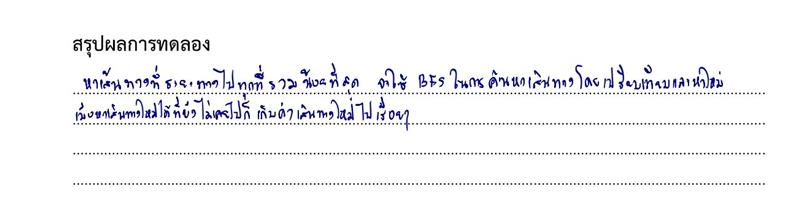

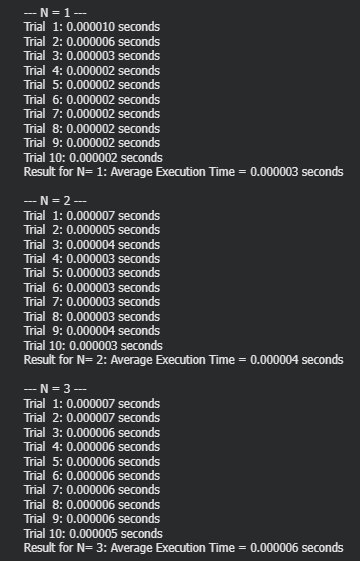

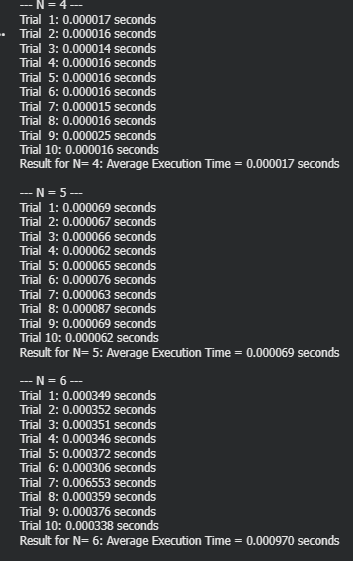

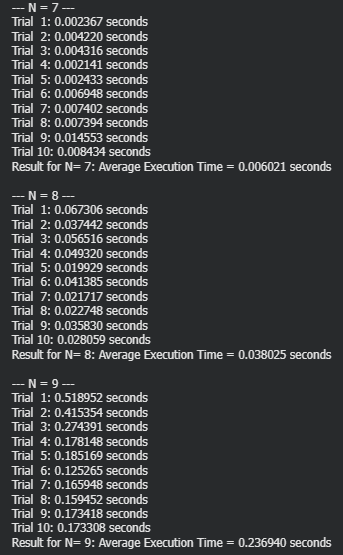

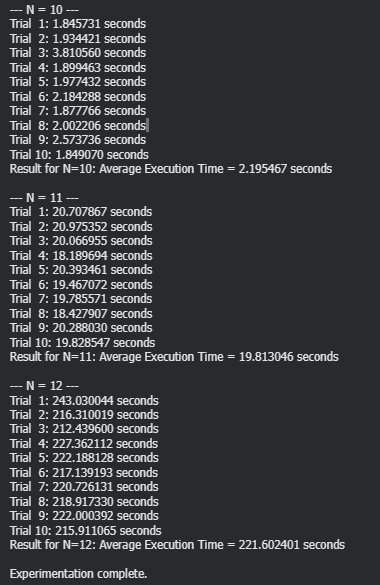